In [1]:
import pandas as pd
import os 
import numpy as np
import smtplib
from dotenv import load_dotenv
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from openai import OpenAI
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [2]:
# Load environment variables
load_dotenv()

True

In [6]:
receiver_email = os.getenv("SENDER_EMAIL")
print(receiver_email)

labs@risenetworks.org


In [6]:
file_url = r"https://raw.githubusercontent.com/Rise-Networks-AI-Labs/Grant_Tracking_System/refs/heads/main/data/grant_data.csv"

df = pd.read_csv(file_url)

In [53]:
grant_content_list = []
def generate_email_content(df):
    df = df
    for _, rows in df.iterrows():
        grant_name = rows["Grant Name"]
        status = rows["Status"]
        deadline = rows["Deadline"]
        application_link = rows["Application Link"]
        priority = rows["Priority"]

        completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": """
                    You are a grants communication analyst responsible for highlighting funding opportunities for a newsletter. 
                    You will receive a list of grants.

                    Each grant includes:
                    - Grant Name
                    - Status
                    - Deadline
                    - Application Link
                    - Priority

                     task is to:
                    - Highlight all the grant opportunities with their respective information.
                    - Highlight key info such as priorities, and deadlines, etc.
                    - Do not copy directly; paraphrase for clarity and brevity.
                    - Use professional, and informative language suitable for NGOs.
                    """
            },
            {
                "role": "user",
                "content": f"""
                    **Grant Name:** {grant_name}

                    **SYourtatus:**
                    {status}

                    **Deadline:**
                    {deadline}

                    **Application Link:**
                    {application_link}

                    **Priority:**
                    {priority}

                    Generate a structured and engaging two-paragraph summary that highlights the funding opportunities from this category. 
                    This is meant to be a reminder mail.
                """
            }
        ],
            temperature=0
            )
        content = completion.choices[0].message.content.strip()
        # Append all the content
        grant_content_list.append(content)
    return grant_content_list

In [54]:
def merge_email_content():
    grant_content_list = generate_email_content(df)
    # Merge all the content
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": """
                    You role is to highlight the important informatiion in a list. The list contains summary of different grants content.

                    Your task is to:
                    - Highlight all the grant opportunities with their respective information.
                    - Highlight key info such as priorities, and deadlines, etc.
                    - Do not copy directly; paraphrase for clarity and brevity.
                    - Use professional, and informative language suitable for NGOs.
                    """
            },
            {
                "role": "user",
                "content": f"""
                    **Grant_List:** {grant_content_list}

                    Generate a structured and engaging two-paragraph summary that highlights the funding opportunities from this category. 
                    This is meant to be a reminder mail. Also note the email should address the MD and every other person. The closing remark should not include any name.
                    The Subject should not be included. The message should begin from the greetings.
                """
            }
        ],
        temperature=0
    )

    grant_content = completion.choices[0].message.content.strip()

    # Print or save the newsletter
    output_path = os.path.join(OUTPUTS_DIR, "Grant_Draft.txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(grant_content)
        print(f"Email draft content saved as Grant_Draft.txt")

    return grant_content

In [55]:
email_content = merge_email_content()

NameError: name 'OUTPUTS_DIR' is not defined

In [49]:
print(email_content)

Dear Managing Director and Team,

We are excited to remind you of two significant funding opportunities currently available: the Rural Development Grant and the Urban Development Grant. The Rural Development Grant is a high-priority initiative aimed at fostering sustainable growth and improving the quality of life in rural communities. This grant offers a substantial opportunity for NGOs to secure funding for impactful projects that can drive meaningful change. On the other hand, the Urban Development Grant, while categorized as low priority, provides a valuable chance for organizations to enhance urban infrastructure and community development. Both grants have an application deadline of September 15, 2025, allowing ample time for thorough preparation and submission of comprehensive proposals.

We encourage all interested parties to visit the Rise Networks platform to access detailed information and application forms for both grants. This is an excellent opportunity for your organizati

In [ ]:
def send_email():
    # Get the parent directory of the current script
    BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

    OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs', 'Grant_Draft.txt')

    OUTPUT_DIR = os.path.normpath(OUTPUT_DIR)
    if os.path.exists(OUTPUT_DIR):
        with open(OUTPUT_DIR, "r", encoding="utf-8") as f:
            newsletter_content = f.read()

        # create sender's email address
        sender_email = "ayonitemiferanmi@gmail.com"

        # create receiver's email address
        receiver_email = ["feranmi.oyedare@hamoye.org", "oyedare.feranmi@lmu.edu.ng"]

        # create the subject for the message
        subject = "African Authors recognized for their research work"

        # Create Email Message
        msg = MIMEMultipart()
        msg["From"] = sender_email
        msg["To"] = ", ".join(receiver_email)  # Multiple recipients
        msg["Subject"] = subject

        # Attach the Email Body
        msg.attach(MIMEText(newsletter_content, "plain", "utf-8"))  # Set encoding to utf-8

        # create the SMTP server
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()

        # login to the email account
        server.login(user=sender_email, password=os.getenv("GOOGLE_APP_PASSWORD"))

        # send the email
        server.sendmail(sender_email, receiver_email, msg.as_string())

        print("Email sent out success")
    else:
        print("File not found")
    return "Email sent out successfully!"

In [3]:
import socket

try:
    socket.create_connection(("smtp.gmail.com", 587), timeout=30)
    print("SMTP server reachable.")
except Exception as e:
    print("Failed to connect to SMTP server:", e)

Failed to connect to SMTP server: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


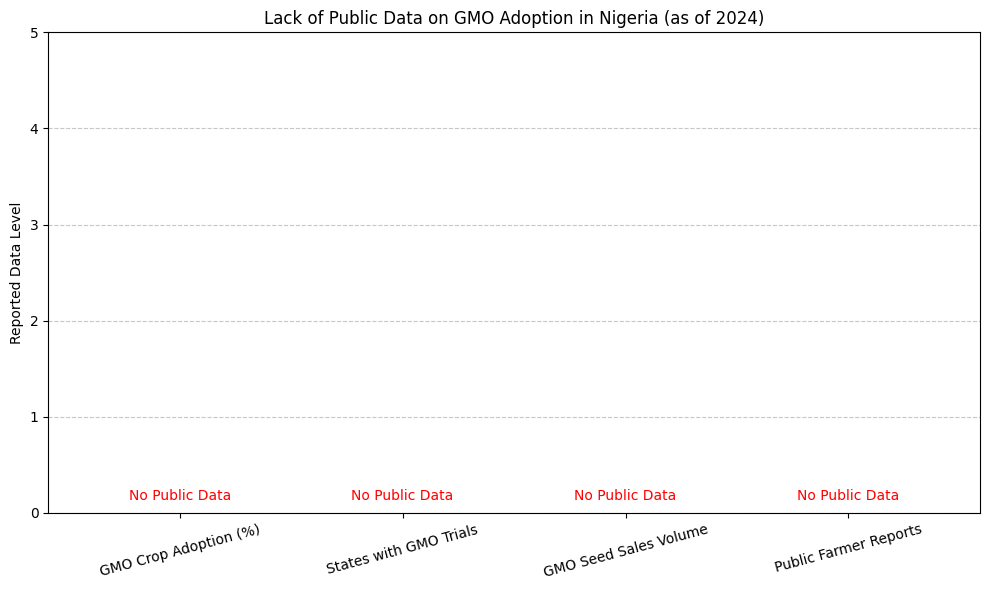

In [1]:
import matplotlib.pyplot as plt

# Create a bar chart showing "Data Not Available" across various GMO metrics
labels = [
    "GMO Crop Adoption (%)",
    "States with GMO Trials",
    "GMO Seed Sales Volume",
    "Public Farmer Reports"
]
values = [0, 0, 0, 0]

# Highlight that values are unknown / not available
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values, color='grey')

# Add annotation for each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, 'No Public Data', ha='center', va='bottom', fontsize=10, color='red')

ax.set_ylim(0, 5)
ax.set_ylabel("Reported Data Level")
ax.set_title("Lack of Public Data on GMO Adoption in Nigeria (as of 2024)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


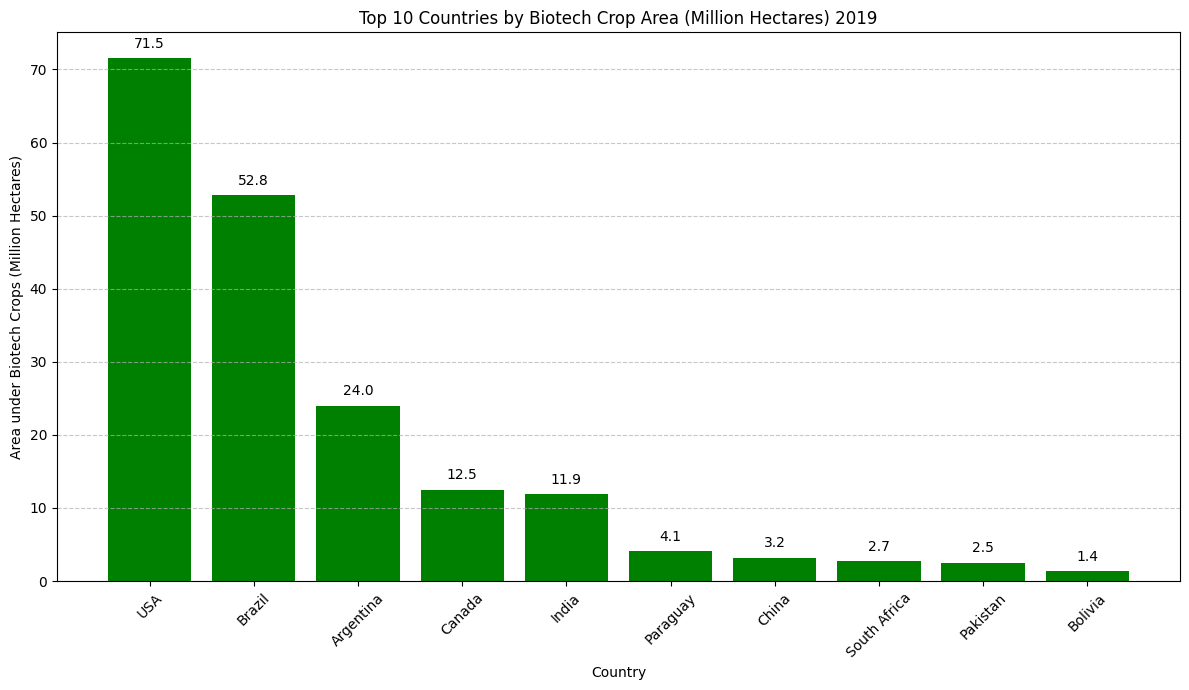

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Construct the data
data = {
    "Country": [
        "USA", "Brazil", "Argentina", "Canada", "India", "Paraguay", "China", "South Africa", "Pakistan", "Bolivia",
        "Uruguay", "Philippines", "Australia", "Myanmar", "Sudan", "Mexico", "Spain", "Colombia", "Vietnam", "Honduras",
        "Chile", "Malawi", "Portugal", "Indonesia", "Bangladesh", "Nigeria", "Eswatini", "Ethiopia", "Costa Rica"
    ],
    "Area (million ha)": [
        71.5, 52.8, 24.0, 12.5, 11.9, 4.1, 3.2, 2.7, 2.5, 1.4,
        1.2, 0.9, 0.6, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.05,
        0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05
    ]
}

df = pd.DataFrame(data)

# Sort for top 10 biotech crop areas
top10_df = df.head(10)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(top10_df["Country"], top10_df["Area (million ha)"], color='green')
plt.title("Top 10 Countries by Biotech Crop Area (Million Hectares) 2019")
plt.xlabel("Country")
plt.ylabel("Area under Biotech Crops (Million Hectares)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [3]:
df["Area (million ha)"].sum()

np.float64(190.80000000000004)

In [ ]:
import requests

url = "http://16.171.198.174:8000/score_result"
payload = {
    "question_id": "15",
    "type": "theory",
    "answer": "Noun can be defined as anything.",
    "correct": "Noun is a naming word.",
    "status": "PENDING"
}
response = requests.post(url, json=payload)
print(response.json())

200
{'question_id': '15', 'type': 'theory', 'answer': 'Noun can be defined as anything.', 'correct': 'Noun is a naming word.', 'status': 'MARKED', 'score': 0.801}


In [6]:
response.json()

{'question_id': '15',
 'type': 'theory',
 'answer': 'Noun can be defined as anything.',
 'correct': 'Noun is a naming word.',
 'status': 'MARKED',
 'score': 0.801}